In [315]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("/Users/kimhyuk/Downloads/drive-download-20200928T050448Z-001/train.csv", encoding='utf-8', index_col='PassengerId')
test = pd.read_csv("/Users/kimhyuk/Downloads/drive-download-20200928T050448Z-001/test.csv", encoding='utf-8', index_col='PassengerId')

# 결측치와 타입 확인

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [317]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


# plt로 그래프 뽑아보기

## Fare 상한 값처리 및 log처리

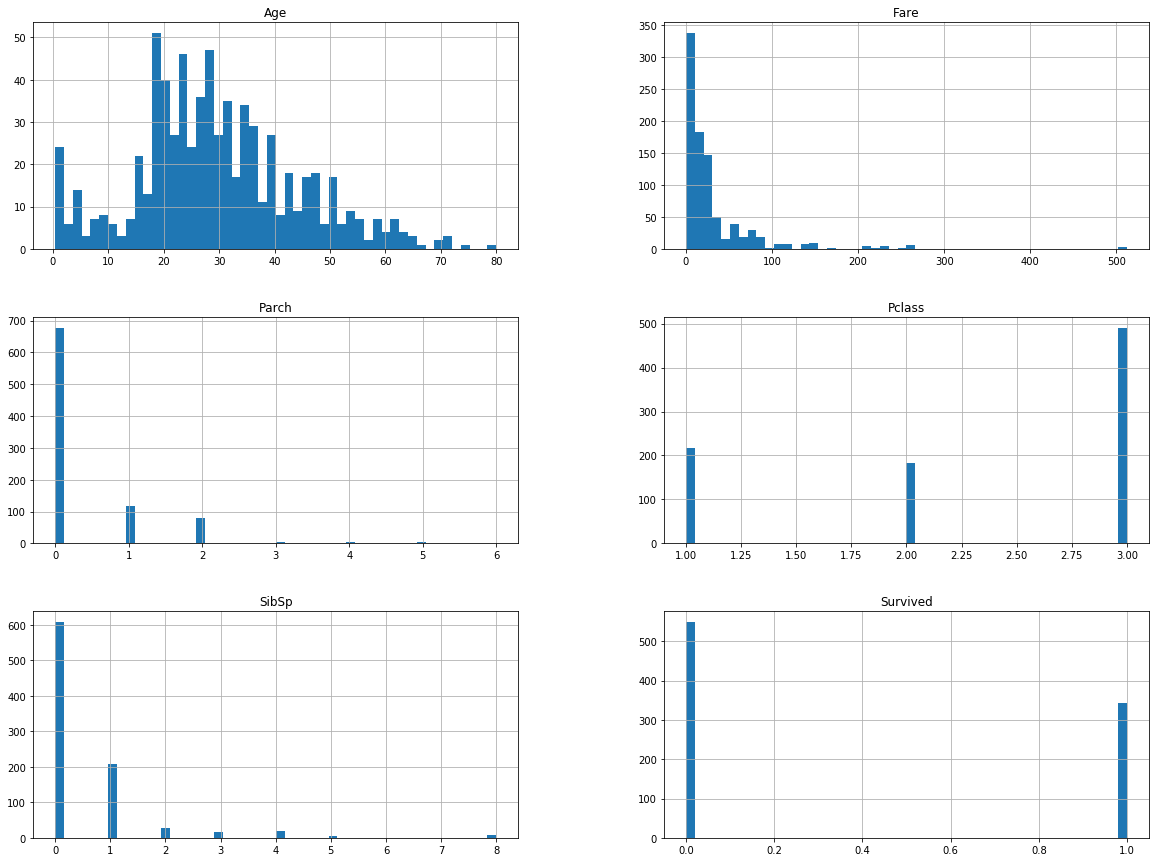

In [318]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

# 필요없는 컬럼 제거

In [319]:
df.drop(columns='Ticket', inplace=True)
test.drop(columns='Ticket', inplace=True)

# shape확인

In [320]:
print(df.shape)
print(test.shape)

(891, 10)
(418, 9)


# 상관계수 확인

In [321]:
print(df.corr())
print(test.corr())

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000
          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.492143  0.001087  0.018721 -0.577147
Age    -0.492143  1.000000 -0.091587 -0.061249  0.337932
SibSp   0.001087 -0.091587  1.000000  0.306895  0.171539
Parch   0.018721 -0.061249  0.306895  1.000000  0.230046
Fare   -0.577147  0.337932  0.171539  0.230046  1.000000


# train(df)과 test의 Age 결측치를 평균나이인 28살로 채움 

In [322]:
avg_age = 28
df['Age'].fillna(avg_age, inplace = True)
test['Age'].fillna(avg_age, inplace = True)

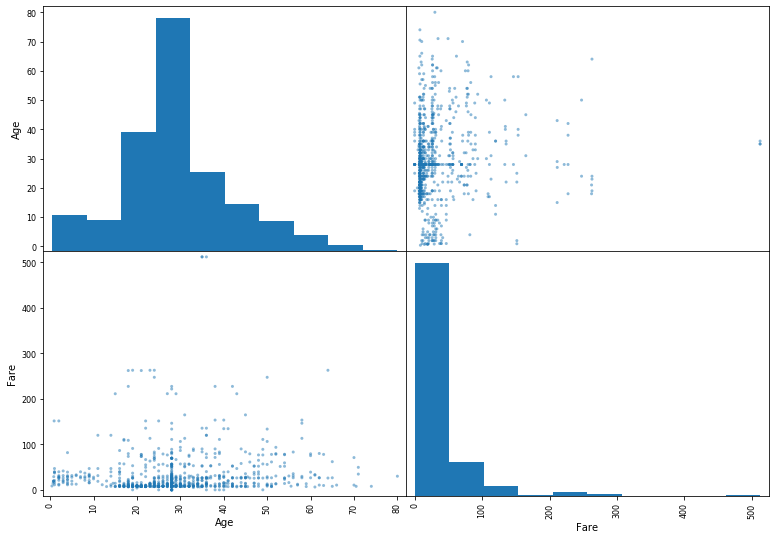

In [323]:
from pandas.plotting import scatter_matrix

features = ["Age", "Fare"]

scatter_matrix(df[features], figsize=(13, 9))
plt.show()

# 성별 One-Hot Encoding

In [324]:
df.loc[df["Sex"] == "male", "Sex"] = 0
df.loc[df["Sex"] == "female", "Sex"] = 1

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

print(df.shape)
print(test.shape)
df.head()

(891, 10)
(418, 9)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S


# Fare 상한값 처리 

(891, 10) (838, 10)


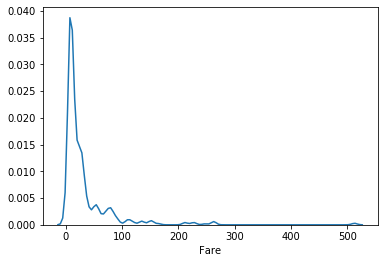

In [325]:
sns.distplot(df['Fare'], hist=False) # 아예 컬럼을 하나 지정을 해서 사용한다. y축 : 전체 데이의 분포( % )

df['Fare'] < 100
low_fare = df[df['Fare'] < 100]

print(df.shape, low_fare.shape)

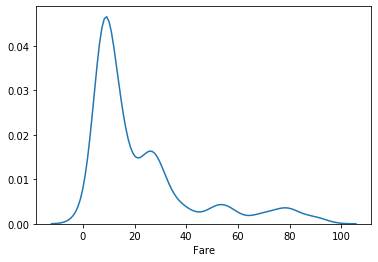

In [326]:
sns.distplot(low_fare['Fare'], hist=False)

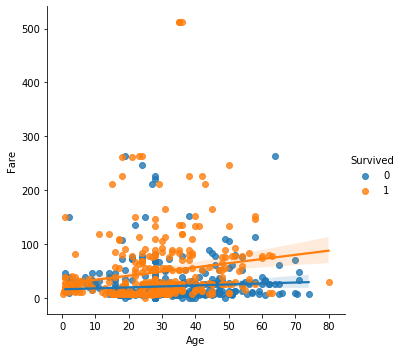

In [327]:
sns.lmplot(data = df, x='Age', y='Fare', hue='Survived')

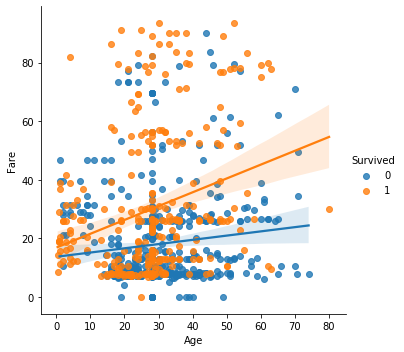

In [328]:
# 아웃 라이어 제거하기
low_fare = df[df['Fare'] < 100]

sns.lmplot(data = low_fare, x='Age', y='Fare', hue='Survived')

# 원핫 인코딩을 위한 Embarked Dataframe 만들기

In [329]:
df_embarked = df[['Embarked']]

# (한번 보고 싶었던 히트맵 상관계수)

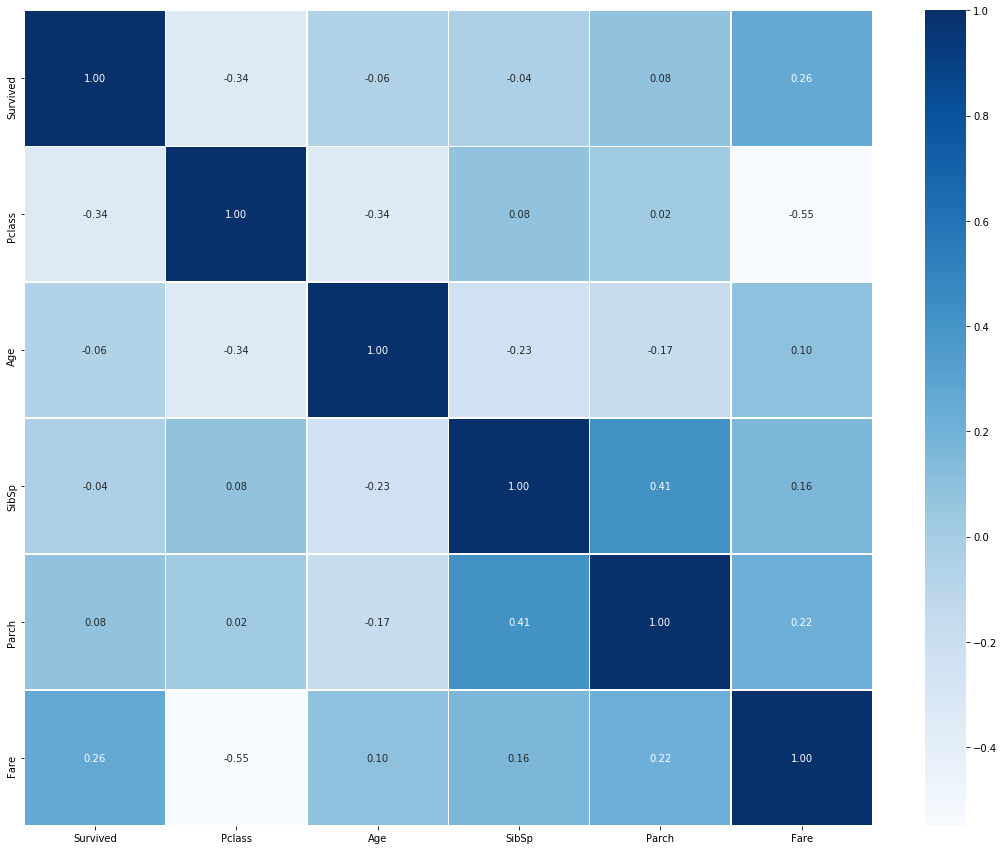

In [330]:
plt.figure(figsize=(19,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# Embarked 결측치 처리 및 원핫 인코딩
### 승선항구인 사우스 햄튼(S)의 비율이 제일 높아 결측치를 S로 채웠다.

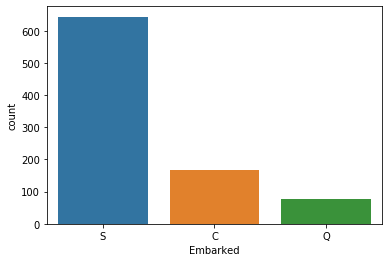

In [331]:
sns.countplot(x= 'Embarked', data= df)

In [332]:
df['Embarked'].fillna('S',inplace=True)
test['Embarked'].fillna('S',inplace=True)

In [333]:
# 원핫 인코딩
Embarked_encoded = pd.get_dummies(df['Embarked'],prefix= 'Embarked')
df = pd.concat((df,Embarked_encoded), axis=1)
df = df.drop(columns = 'Embarked')

Embarked_encoded = pd.get_dummies(test['Embarked'],prefix= 'Embarked')
test = pd.concat((test,Embarked_encoded), axis=1)
test = test.drop(columns = 'Embarked')

# NULL값 확인

In [334]:
print(df.isnull().sum())
print(test.isnull().sum())

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Cabin         687
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            1
Cabin         327
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64


# Fare를 정규분포처럼 만들기 위한 log 작업

In [335]:
df['Fare'] = np.log(df['Fare'] + 1)
test['Fare'] = np.log(test['Fare'] + 1)

In [336]:
print(df['Fare'])
print(test['Fare'])

PassengerId
1      2.110213
2      4.280593
3      2.188856
4      3.990834
5      2.202765
         ...   
887    2.639057
888    3.433987
889    3.196630
890    3.433987
891    2.169054
Name: Fare, Length: 891, dtype: float64
PassengerId
892     2.178064
893     2.079442
894     2.369075
895     2.268252
896     2.586824
          ...   
1305    2.202765
1306    4.699571
1307    2.110213
1308    2.202765
1309    3.150952
Name: Fare, Length: 418, dtype: float64


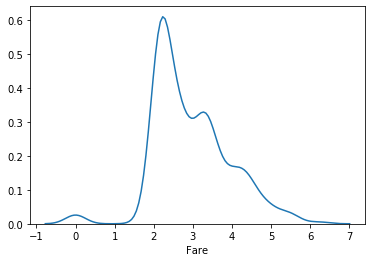

In [337]:
sns.distplot(df['Fare'], hist=False)

# 안쓰는 Name, Cabin 컬럼 제거

In [338]:
df.drop(columns='Cabin', inplace=True)
test.drop(columns='Cabin', inplace=True)

In [339]:
print(df.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Fare        891 non-null    float64
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), object(2), uint8(3)
memory usage: 105.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Name        418 non-null    object 
 2   Sex   

In [340]:
df.drop(columns='Name', inplace=True)
test.drop(columns='Name', inplace=True)
print(df.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), object(1), uint8(3)
memory usage: 98.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Age         418 non-null    float64
 3   SibSp   

In [341]:
print(df.shape)
print(test.shape)

(891, 10)
(418, 9)


# Fare에 있는 결측치 하나를 0으로 바꿈

In [342]:
test.loc[test["Fare"].isnull(), "Fare"] = 0
test[test["Fare"].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,


In [343]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), object(1), uint8(3)
memory usage: 24.1+ KB


# 정답지 빼기

In [344]:
label_name = "Survived"

# train dataframe의 Survived 컬럼를 가져옵니다.
y_train = df[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [345]:
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [346]:
df.drop(columns='Survived', inplace=True)

In [347]:
print(df.shape)
print(test.shape)

(891, 9)
(418, 9)


# 랜덤 포레스트 사용해서 예측하기.

In [348]:
full_train_data = df.copy()
full_train_label = y_train.copy()
full_test_data   = test.copy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(full_train_data, full_train_label, random_state=0)

In [349]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=4)
forest.fit(X_train, y_train)
print("Training score : {:.3f}".format(forest.score(X_train, y_train)))
print("Test score : {:.3f}".format(forest.score(X_test, y_test)))

Training score : 0.979
Test score : 0.834
